# Exercícios - Introdução a Pandas

O objetivo desse notebook é ajudar na fixação dos conteúdos da aula de [Introdução a Pandas]().  

Caso haja alguma dúvida, consulte o material e as referências bibliográficas, mas também estamos à disposição por e-mail, slack ou telegram! Não hesite em falar conosco =D

## Estruturas

### Serie

In [1]:
import pandas as pd

In [2]:
dict_alunos = {'Ana': 7, 'Ze': 8, 'Maria': 9, 'João': 9, 'Anne': 10}

In [3]:
dict_alunos

{'Ana': 7, 'Ze': 8, 'Maria': 9, 'João': 9, 'Anne': 10}

In [4]:
alunos = pd.Series(dict_alunos)

In [5]:
alunos

Ana       7
Ze        8
Maria     9
João      9
Anne     10
dtype: int64

In [6]:
alunos.index

Index(['Ana', 'Ze', 'Maria', 'João', 'Anne'], dtype='object')

In [7]:
alunos[0]

7

In [8]:
alunos.max()

10

In [9]:
alunos.idxmax()

'Anne'

## Dataframe

In [10]:
dict_alunos = {'Nome': ['Ana', 'Ze', 'Maria', 'João', 'Anne'],
               'Prova': [3, 8, 4, 9, 10],
               'Trabalho': [10, 5, 4, 6, 4],
               'Seminário': [10, 6, 7, 3, 0.5]
}

df = pd.DataFrame(dict_alunos)
df

,Nome,Prova,Trabalho,Seminário
0,Ana,3,10,10.0
1,Ze,8,5,6.0
2,Maria,4,4,7.0
3,João,9,6,3.0
4,Anne,10,4,0.5


In [11]:
df.to_csv('alunos.csv', sep = ';')

## Leitura de Dados

In [32]:
df_lido = pd.read_csv('alunos.csv', sep = ';', index_col = 0)
df_lido

,Nome,Prova,Trabalho,Seminário
0,Ana,3,10,10.0
1,Ze,8,5,6.0
2,Maria,4,4,7.0
3,João,9,6,3.0
4,Anne,10,4,0.5


## Visualização do Dataframe

In [28]:
df_lido.columns

Index(['Nome', 'Prova', 'Trabalho', 'Seminário'], dtype='object')

In [29]:
df_lido.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [30]:
df_lido.dtypes

Nome          object
Prova          int64
Trabalho       int64
Seminário    float64
dtype: object

In [31]:
df_lido.head(n=3)

,Nome,Prova,Trabalho,Seminário
0,Ana,7,10,10.0
1,Ze,8,5,6.0
2,Maria,9,4,7.0


In [32]:
df_lido.tail(n=4)

,Nome,Prova,Trabalho,Seminário
1,Ze,8,5,6.0
2,Maria,9,4,7.0
3,João,9,6,3.0
4,Anne,10,4,0.5


## Seleção dos dados

In [33]:
df_lido['Prova']

0     7
1     8
2     9
3     9
4    10
Name: Prova, dtype: int64

In [38]:
df_lido.iloc[0]

Nome         Ana
Prova          7
Trabalho      10
Seminário     10
Name: 0, dtype: object

In [39]:
df_lido.loc[1]

Nome         Ze
Prova         8
Trabalho      5
Seminário     6
Name: 1, dtype: object

In [46]:
df_lido['Prova'].iat[1] = 5

In [47]:
df_lido['Seminário'].at[1] = 10

In [56]:
df_lido

,Nome,Prova,Trabalho,Seminário
0,Ana,3,10,10.0
1,Ze,8,5,6.0
2,Maria,4,4,7.0
3,João,9,6,3.0
4,Anne,10,4,0.5


## Indexação booleana

In [54]:
df_lido[df_lido['Prova'] > 5]

,Nome,Prova,Trabalho,Seminário
1,Ze,8,5,6.0
3,João,9,6,3.0
4,Anne,10,4,0.5


In [55]:
df_lido[(df_lido['Prova'] >= 5) & (((df_lido['Seminário'] + df_lido['Trabalho']) / 2) >= 5)]

,Nome,Prova,Trabalho,Seminário
1,Ze,8,5,6.0


In [59]:
df_lido[(df_lido['Prova'] < 5) | (df_lido['Seminário'] < 5) | (df_lido['Trabalho'] < 5)].count()

Nome         4
Prova        4
Trabalho     4
Seminário    4
dtype: int64

## Operações

In [60]:
df_lido.mean()

Prova        6.8
Trabalho     5.8
Seminário    5.3
dtype: float64

In [61]:
df_lido.min()

Nome         Ana
Prova          3
Trabalho       4
Seminário    0.5
dtype: object

In [62]:
df_lido.max()

Nome         Ze
Prova        10
Trabalho     10
Seminário    10
dtype: object

In [63]:
df_lido['Média'] = (df_lido['Prova'] + df_lido['Seminário'] + df_lido['Trabalho']) / 3
df_lido

,Nome,Prova,Trabalho,Seminário,Média
0,Ana,3,10,10.0,7.666667
1,Ze,8,5,6.0,6.333333
2,Maria,4,4,7.0,5.000000
3,João,9,6,3.0,6.000000
4,Anne,10,4,0.5,4.833333


## Apply

In [31]:
# crie uma feature nova contendo a maior nota que o aluno tirou dentre todas as avaliações

## Funções Úteis

In [68]:
df_lido['Prova'].value_counts()

4     1
3     1
10    1
9     1
8     1
Name: Prova, dtype: int64

In [69]:
df_lido['Trabalho'].value_counts()[:2]

4    2
6    1
Name: Trabalho, dtype: int64

In [70]:
df_lido.describe()

,Prova,Trabalho,Seminário,Média
count,5.000000,5.00000,5.000000,5.000000
mean,6.800000,5.80000,5.300000,5.966667
std,3.114482,2.48998,3.667424,1.145038
min,3.000000,4.00000,0.500000,4.833333
25%,4.000000,4.00000,3.000000,5.000000
50%,8.000000,5.00000,6.000000,6.000000
75%,9.000000,6.00000,7.000000,6.333333
max,10.000000,10.00000,10.000000,7.666667


## Dados faltantes

In [35]:
novo_aluno = {'Nome': 'Bia'}
df_lido = df_lido.append(novo_aluno, ignore_index = True)
df_lido

,Nome,Prova,Trabalho,Seminário
0,Ana,3.0,10.0,10.0
1,Ze,8.0,5.0,6.0
2,Maria,4.0,4.0,7.0
3,João,9.0,6.0,3.0
4,Anne,10.0,4.0,0.5
5,Bia,6.8,5.8,5.3
6,Carlos,6.8,5.8,5.3
7,Bia,NaN,NaN,NaN


In [36]:
df_lido = df_lido.fillna(df.mean())
df_lido

,Nome,Prova,Trabalho,Seminário
0,Ana,3.0,10.0,10.0
1,Ze,8.0,5.0,6.0
2,Maria,4.0,4.0,7.0
3,João,9.0,6.0,3.0
4,Anne,10.0,4.0,0.5
5,Bia,6.8,5.8,5.3
6,Carlos,6.8,5.8,5.3
7,Bia,6.8,5.8,5.3


## Plot

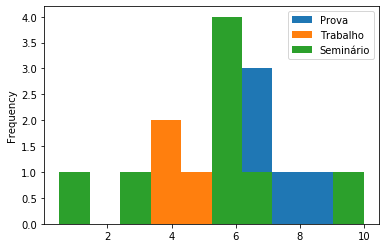

In [41]:
df_lido.plot.hist()

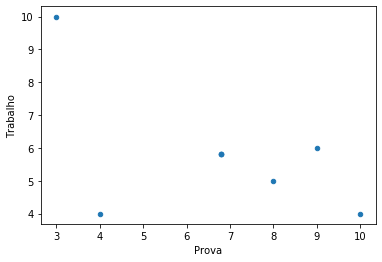

In [42]:
df_lido.plot.scatter(x = 'Prova', y = 'Trabalho')

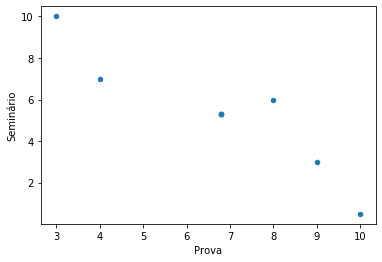

In [44]:
df_lido.plot.scatter(x = 'Prova', y = 'Seminário')

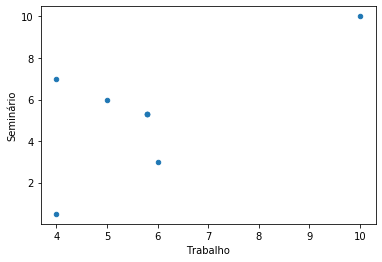

In [45]:
df_lido.plot.scatter(x = 'Trabalho', y = 'Seminário')